In [1]:
import os.path

import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [2]:
# Load data
path = '../data/clean_data/univariate_Q_Kallveit.csv'
data = pd.read_csv(path, index_col='Datetime')
data

,Q_Kalltveit
Datetime,
2015-01-01 00:00:00,3.37060
2015-01-01 01:00:00,3.45242
2015-01-01 02:00:00,3.56260
2015-01-01 03:00:00,3.74423
2015-01-01 04:00:00,4.02901
...,...
2022-03-21 19:00:00,2.43457
2022-03-21 20:00:00,2.42514
2022-03-21 21:00:00,2.41576


In [3]:
df = concat([data.shift(1), data], axis=1)
df.columns = ['t', 't+1']
print(df.head(5))

                           t      t+1
Datetime                             
2015-01-01 00:00:00      NaN  3.37060
2015-01-01 01:00:00  3.37060  3.45242
2015-01-01 02:00:00  3.45242  3.56260
2015-01-01 03:00:00  3.56260  3.74423
2015-01-01 04:00:00  3.74423  4.02901


Test RMSE: 0.824
Test MAE: 0.252


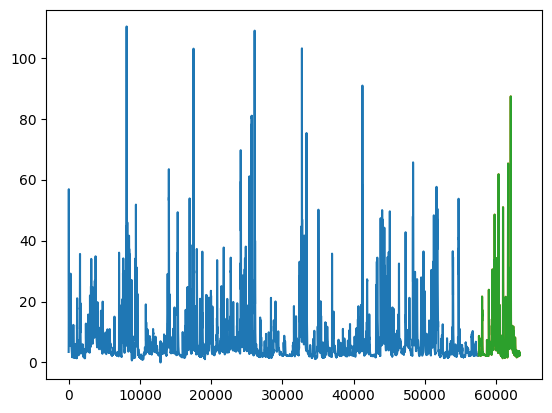

In [4]:
X = df.values
train_size = 57569
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
def model_persistence(x):
	return x
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
rmse = mean_squared_error(test_y, predictions, squared=False)
print('Test RMSE: %.3f' % rmse)
mae = mean_absolute_error(test_y, predictions)
print('Test MAE: %.3f' % mae)
# plot predictions and expected results
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()